Data sourced from: https://www.sciencedirect.com/search?qs=hotel+booking&pub=Data+in+Brief&cid=311593

In [398]:
# Importing all import python libraries
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

pd.set_option("display.max_columns", 100)
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

In [399]:
# Reading in the data
# # df = pd.read_csv('hotel_booking_random_extended_to_2024.csv')

# df = pd.read_csv('/Users/kayodew/python_files/school_projects/hotel_dataset_EDA_with_python/hotel_booking_data.csv')

In [400]:
# Import resort hotel & and city hotel
h1 = pd.read_csv('/Users/kayodew/python_files/school_projects/hotel_dataset_EDA_with_python/H1_resort.csv')
h2 = pd.read_csv('/Users/kayodew/python_files/school_projects/hotel_dataset_EDA_with_python/H2_city.csv')

We would need to merge both datasets into one sheet fo a holistic analysis. We could do this with the merge function.

In [401]:
#let's merge both tables so we could perform a holistic analysis across both
df = pd.concat([h1.assign(hotel_type="city"), h2.assign(hotel_type="resort")],ignore_index = True) # merge the tables using the foncat function to create a union

ADR: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights.

Adults: Number of adults.

Agent: ID of the travel agency that made the booking.

ArrivalDateDayOfMonth: Day of the month of the arrival date.

ArrivalDateMonth: Month of arrival date with 12 categories: “January” to “December”.

ArrivalDateWeekNumber: Week number of the arrival date.

ArrivalDateYear: Year of arrival date.

AssignedRoomType: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

Babies: Number of babies.

BookingChanges: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.

Children: Number of children.

Company: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons.

Country: Country of origin. Categories are represented in the ISO 3155–3:2013 format.

CustomerType: Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking.

DaysInWaitingList: Number of days the booking was in the waiting list before it was confirmed to the customer.

DepositType: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.

DistributionChannel: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”.

IsCanceled: Value indicating if the booking was canceled (1) or not (0).

IsRepeatedGuest: Value indicating if the booking name was from a repeated guest (1) or not (0).

LeadTime: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.

MarketSegment: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”.

Meal: Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner).

PreviousBookingsNotCanceled: Number of previous bookings not cancelled by the customer prior to the current booking.

PreviousCancellations: Number of previous bookings that were cancelled by the customer prior to the current booking.

RequiredCarParkingSpaces: Number of car parking spaces required by the customer.

ReservationStatus: Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why.

ReservationStatusDate: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel.

ReservedRoomType: Code of room type reserved. Code is presented instead of designation for anonymity reasons.

StaysInWeekendNights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.

StaysInWeekNights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel.

TotalOfSpecialRequests: Number of special requests made by the customer (e.g. twin bed or high floor).

# EDA 1
# Understanding The Dataset

In [402]:
# Call the head() method to display the first few rows of the DataFrame
df.hotel_type.unique()

array(['city', 'resort'], dtype=object)

In [403]:
# Using the info method, we can catch a quick summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   IsCanceled                   119390 non-null  int64  
 1   LeadTime                     119390 non-null  int64  
 2   ArrivalDateYear              119390 non-null  int64  
 3   ArrivalDateMonth             119390 non-null  object 
 4   ArrivalDateWeekNumber        119390 non-null  int64  
 5   ArrivalDateDayOfMonth        119390 non-null  int64  
 6   StaysInWeekendNights         119390 non-null  int64  
 7   StaysInWeekNights            119390 non-null  int64  
 8   Adults                       119390 non-null  int64  
 9   Children                     119386 non-null  float64
 10  Babies                       119390 non-null  int64  
 11  Meal                         119390 non-null  object 
 12  Country                      118902 non-null  object 
 13 

In [404]:
#Using the shape method, we see that the dataset consists of 36 columns with 119,390 rows.
df.shape

# This dynamic print statememt helps to show the information about the rows and columns contained in the dataset
print(f'We have {df.shape[0]:,.0f} records in this dataset with a total of {df.shape[1]} columns')


We have 119,390 records in this dataset with a total of 32 columns


In [405]:
# Using the describe method, we can also tell quick insights, such as the maximum and minimum adr
df.describe()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
count,"119,390.00","119,390.00","119,390.00","119,390.00","119,390.00","119,390.00","119,390.00","119,390.00","119,386.00","119,390.00","119,390.00","119,390.00","119,390.00","119,390.00","119,390.00","119,390.00","119,390.00","119,390.00"
mean,0.37,104.01,"2,016.16",27.17,15.80,0.93,2.50,1.86,0.10,0.01,0.03,0.09,0.14,0.22,2.32,101.83,0.06,0.57
std,0.48,106.86,0.71,13.61,8.78,1.00,1.91,0.58,0.40,0.10,0.18,0.84,1.50,0.65,17.59,50.54,0.25,0.79
min,0.00,0.00,"2,015.00",1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-6.38,0.00,0.00
25%,0.00,18.00,"2,016.00",16.00,8.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,69.29,0.00,0.00
50%,0.00,69.00,"2,016.00",28.00,16.00,1.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,94.58,0.00,0.00
75%,1.00,160.00,"2,017.00",38.00,23.00,2.00,3.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,126.00,0.00,1.00
max,1.00,737.00,"2,017.00",53.00,31.00,19.00,50.00,55.00,10.00,10.00,1.00,26.00,72.00,21.00,391.00,"5,400.00",8.00,5.00


Next, we could attempt understanding certain fields that may be of interest

In [406]:
df.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate',
       'hotel_type'],
      dtype='object')

In [407]:
df.CustomerType.unique() # Let's see the unique values in the customer_type column.

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [408]:
df.Meal.unique()

array(['BB       ', 'FB       ', 'HB       ', 'SC       ', 'Undefined'],
      dtype=object)

The meal field shows that white spaces are present in some of the values. Before any analysis is done using the field, we can use the str.strip() method to remove any leading or trailing white spaces from the meal column.

In [409]:
df.Country.unique() # We can also check the unique values in the Country field.

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

The countries seem to be some sort of code to represent the country, we could explore translating them for easy understanding

## EDA 2
# Data Cleaning

Cleaning data is crucial step before EDA as it will remove the ambigous data that can affect the outcome of EDA.

While cleaning data we will perform following steps:
1. Remove duplicate rows.
2. Handling missing values.  
3. Convert columns to appropriate datatypes.
4. Replacing ambigous data representations.
5. Adding important columns.

In [410]:
# Lets start by cleaning the column names

# for s in df.columns:
#     new_name_chars = []          # will hold characters for the new name

#     for c in s:                  # go through each character in the column name
#         if c.isupper():          # if character is uppercase
#             new_name_chars.append(' ' + c)   # add a space before it
#         else:
#             new_name_chars.append(c)         # otherwise, keep it as is

#     # join the characters into a string
#     new_name = ''.join(new_name_chars)

df.columns = [ ''.join([' ' + c if c.isupper() else c for c in s]).strip() for s in df.columns] 
df.columns =df.columns.str.replace(' ', '_').str.lower()
df.rename(columns = {'a_d_r': 'adr'}, inplace = True)

In [411]:
df.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'hotel_type'],
      dtype='object')

## 1 Handeling duplicates (if any)

In [412]:
df1 = df.copy() # Start my making a copy of the data, this would ensure that we don't lose any relevant information.

df1.shape

(119390, 32)

In [413]:
df1.drop_duplicates(inplace = True) # Dropping the duplicated values within the dataset

print(f'After dropping duplicates, we now have {df1.shape[0]:,.0f} records in this dataset with a total of {df1.shape[1]} columns')

After dropping duplicates, we now have 87,396 records in this dataset with a total of 32 columns


In [414]:
# Checking the top 10 fields with missing values
df1.isnull().sum().sort_values(ascending = False)[:5]

country               452
children                4
is_canceled             0
assigned_room_type      0
booking_changes         0
dtype: int64

The record shows that there are 488 missing values in the country column, 4 missing values in the agent column.

For country, since its a categorical variable, we could choose to fill it with 'Unknown' or 'Not provided'.

In [415]:
df1['country'] = df1['country'].fillna('Not Provided')

For children, the null values could mean that there were no children accopanying the guests and so the filed was left unfilled. Hence, we could choose to replace with 0 for our analysis.

In [416]:
df1['children'] = df1['children'].fillna(0)

In [417]:
# Lets check to confirm that our replacements were successful.
df1.isnull().sum().value_counts()

0    32
Name: count, dtype: int64

## 2 Convert columns to appropriate datatypes.


In [418]:
# we can correct the the datatpes but first viewing the data types by calling the info method.
df1.info()

# Th =e 'children' column shows that it is a float data type, we can convert this to integer since it makes more sense to have whole numbers for this column.

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     87396 non-null  int64  
 1   lead_time                       87396 non-null  int64  
 2   arrival_date_year               87396 non-null  int64  
 3   arrival_date_month              87396 non-null  object 
 4   arrival_date_week_number        87396 non-null  int64  
 5   arrival_date_day_of_month       87396 non-null  int64  
 6   stays_in_weekend_nights         87396 non-null  int64  
 7   stays_in_week_nights            87396 non-null  int64  
 8   adults                          87396 non-null  int64  
 9   children                        87396 non-null  float64
 10  babies                          87396 non-null  int64  
 11  meal                            87396 non-null  object 
 12  country                         8739

The Children field shows up in decimal data type, we would convert this to a pure integer.

In [419]:
# we use the astype method to convert to a preferred datatype. 
df1['children'] = df1['children'].astype('int64')

In [420]:
# We can call the method again to confirm the changes were made.
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     87396 non-null  int64  
 1   lead_time                       87396 non-null  int64  
 2   arrival_date_year               87396 non-null  int64  
 3   arrival_date_month              87396 non-null  object 
 4   arrival_date_week_number        87396 non-null  int64  
 5   arrival_date_day_of_month       87396 non-null  int64  
 6   stays_in_weekend_nights         87396 non-null  int64  
 7   stays_in_week_nights            87396 non-null  int64  
 8   adults                          87396 non-null  int64  
 9   children                        87396 non-null  int64  
 10  babies                          87396 non-null  int64  
 11  meal                            87396 non-null  object 
 12  country                         8739

In [421]:
# We also have columns for adult, children and babies, it wouldn't make sense if all these fields have no values. Let's check to confirm that.

unusl = df1.loc[df1['adults'] + df1['children'] + df1['babies'] == 0, :].shape # Assigning the result to a variable called unusl

print(f'The data tells us that there are {unusl[0]} records where there are no adults, children or babies in the booking.\nThis is unusual as it implies no guests stayed at the hotel and we would need to drop these records since they do not make sense in the context of hotel bookings.')

The data tells us that there are 166 records where there are no adults, children or babies in the booking.
This is unusual as it implies no guests stayed at the hotel and we would need to drop these records since they do not make sense in the context of hotel bookings.


In [422]:
df1 = df1.drop(df1.loc[df1['adults'] + df1['children'] + df1['babies'] == 0, :].index) # Dropping the unusual records and reassigning the results back to df1

For certain fields like country, meals.. it might be easier to run analysis on them if they are converted from their original state to a more readable state.

In [423]:
# Earlier we saw that the meal column contains white spaces, these need to be removed.

df1.meal = df1.meal.str.strip() # Using the str.strip() method to remove any leading or trailing spaces in the meal column.

In [424]:
# Start by creating a map for the meals using the dictionary function
meal_map = {'BB': 'Bed and Breakfast',
            'HB': 'Half Board',
            'FB': 'Full Board',
            'SC': 'Self-Catering'
             }

df1['meal'] = df1['meal'].apply(lambda x: meal_map.get(x)) # Here, we are using the apply and lambda function to map the values in the meal column to get the appropriate meal type from the meal_map dictionary.

In [425]:
# Create country mapping dictionary for the country field. These codes were sourced from https://countrycode.org/
country_map = {
    'PRT': 'Portugal','GBR': 'United Kingdom','USA': 'United States',
    'ESP': 'Spain','IRL': 'Ireland','FRA': 'France',
    'ROU': 'Romania','NOR': 'Norway','OMN': 'Oman','ARG': 'Argentina',
    'POL': 'Poland','DEU': 'Germany','BEL': 'Belgium','CHE': 'Switzerland',
    'CN': 'China','GRC': 'Greece','ITA': 'Italy','NLD': 'Netherlands',
    'DNK': 'Denmark','RUS': 'Russia','SWE': 'Sweden',
    'AUS': 'Australia','EST': 'Estonia','CZE': 'Czech Republic','BRA': 'Brazil',
    'FIN': 'Finland','MOZ': 'Mozambique','BWA': 'Botswana',
    'LUX': 'Luxembourg','SVN': 'Slovenia',
    'ALB': 'Albania','IND': 'India',
    'CHN': 'China','MEX': 'Mexico',
    'MAR': 'Morocco','UKR': 'Ukraine','SMR': 'San Marino',
    'LVA': 'Latvia','PRI': 'Puerto Rico','SRB': 'Serbia','CHL': 'Chile',
    'AUT': 'Austria','BLR': 'Belarus','LTU': 'Lithuania','TUR': 'Turkey',
    'ZAF': 'South Africa','AGO': 'Angola','ISR': 'Israel',
    'CYM': 'Cayman Islands','ZMB': 'Zambia',
    'CPV': 'Cape Verde','ZWE': 'Zimbabwe','DZA': 'Algeria','KOR': 'South Korea',
    'CRI': 'Costa Rica','HUN': 'Hungary',
    'ARE': 'United Arab Emirates','TUN': 'Tunisia','JAM': 'Jamaica',
    'HRV': 'Croatia','HKG': 'Hong Kong','IRN': 'Iran',
    'GEO': 'Georgia','AND': 'Andorra','GIB': 'Gibraltar',
    'URY': 'Uruguay','JEY': 'Jersey','CAF': 'Central African Republic','CYP': 'Cyprus',
    'COL': 'Colombia','GGY': 'Guernsey', 'KWT': 'Kuwait',
    'NGA': 'Nigeria','MDV': 'Maldives','VEN': 'Venezuela',
    'SVK': 'Slovakia','FJI': 'Fiji','KAZ': 'Kazakhstan','PAK': 'Pakistan',
    'IDN': 'Indonesia','LBN': 'Lebanon','PHL': 'Philippines',
    'SEN': 'Senegal','SYC': 'Seychelles',
    'AZE': 'Azerbaijan','BHR': 'Bahrain',
    'NZL': 'New Zealand','THA': 'Thailand','DOM': 'Dominican Republic',
    'MKD': 'North Macedonia','MYS': 'Malaysia',
    'ARM': 'Armenia','JPN': 'Japan','LKA': 'Sri Lanka','CUB': 'Cuba',
    'CMR': 'Cameroon','BIH': 'Bosnia and Herzegovina','MUS': 'Mauritius',
    'COM': 'Comoros',
    'SUR': 'Suriname','UGA': 'Uganda','BGR': 'Bulgaria','CIV': "Côte d'Ivoire",
    'JOR': 'Jordan','SYR': 'Syria','SGP': 'Singapore', 'BDI': 'Burundi',
    'SAU': 'Saudi Arabia','VNM': 'Vietnam','PLW': 'Palau','QAT': 'Qatar',
    'EGY': 'Egypt','PER': 'Peru','MLT': 'Malta','MWI': 'Malawi','ECU': 'Ecuador',
    'MDG': 'Madagascar','ISL': 'Iceland','UZB': 'Uzbekistan',
    'NPL': 'Nepal','BHS': 'Bahamas','MAC': 'Macau','TGO': 'Togo',
    'TWN': 'Taiwan','DJI': 'Djibouti',
    'STP': 'São Tomé and Príncipe','KNA': 'Saint Kitts and Nevis',
    'ETH': 'Ethiopia','IRQ': 'Iraq',
    'HND': 'Honduras','RWA': 'Rwanda','KHM': 'Cambodia','MCO': 'Monaco',
    'BGD': 'Bangladesh','IMN': 'Isle of Man','TJK': 'Tajikistan','NIC': 'Nicaragua',
    'BEN': 'Benin','VGB': 'British Virgin Islands','TZA': 'Tanzania',
    'GAB': 'Gabon','GHA': 'Ghana','TMP': 'Timor-Leste','GLP': 'Guadeloupe',
    'KEN': 'Kenya','LIE': 'Liechtenstein',
    'GNB': 'Guinea-Bissau','MNE': 'Montenegro',
    'UMI': 'United States Minor Outlying Islands','MYT': 'Mayotte',
    'FRO': 'Faroe Islands', 'MMR': 'Myanmar','PAN': 'Panama',
    'BFA': 'Burkina Faso','LBY': 'Libya','MLI': 'Mali','NAM': 'Namibia',
    'BOL': 'Bolivia','PRY': 'Paraguay','BRB': 'Barbados','ABW': 'Aruba',
    'AIA': 'Anguilla','SLV': 'El Salvador','DMA': 'Dominica',
    'PYF': 'French Polynesia','GUY': 'Guyana','LCA': 'Saint Lucia',
    'ATA': 'Antarctica','GTM': 'Guatemala','ASM': 'American Samoa',
    'MRT': 'Mauritania','NCL': 'New Caledonia','KIR': 'Kiribati',
    'SDN': 'Sudan','ATF': 'French Southern Territories',
    'SLE': 'Sierra Leone','LAO': "Lao People's Democratic Republic"
                  }

df1['country'] = df1['country'].apply(lambda c: country_map.get(c)) # Here, we make use of the apply and lambda function to map the values in the country firld to get the appropriate country name from the country_map dictionary.

## 4 Adding important columns.

Next, we would feature engineer possibly needed fields by manipulating existing fields.

We would add the total adults, children and babies and collapse into just one field called total guests

We do the same addition for the week and weekend nights.

In [426]:
df1['total_visitors'] = df1['adults'] + df1['children'] + df1['babies'] # Here we sum up the total adults, children and babies field into one single field.
df1['total_nights'] = df1['stays_in_weekend_nights'] + df1['stays_in_week_nights'] # Same is done for total nights.

Next we apply a logic to figure out if the visitors are families, couples or singles. We could do this using the existing columns for adults, children and babies.

In [427]:
visitor_type= []

for a,b,c in zip(df1['adults'], df1['children'], df1['babies']):
    if a  > 1 and b == 0 and c == 0: # if adult is greater than or equals to 1 and there are no children or babies then it must be a couple.
        visitor_type.append('couples')
    elif a >= 1 and b >= 1 or c >= 1: # If adult is greater than or eq to 1 and there are babies or children then it must be a family.
        visitor_type.append('family')
    else:
        visitor_type.append('single') # Else it must be a single visitor.

df1['visitor_type'] = visitor_type

In [428]:
# Now we drop the original columns since we have created new ones that capture the same information.

df1.drop(columns = ['adults', 'children', 'babies', 'stays_in_weekend_nights', 'stays_in_week_nights'], inplace = True)

In [429]:
print(f'Now we have {df1.shape[1]} total columns, from an earlier total of 31.')

Now we have 30 total columns, from an earlier total of 31.


Now we can move on to analyzing the data we have cleaned and prepared.

## EDA 3
# Analyzing



From this point, we would begin to analyze the data to see what insights we could infer from the dataset.

We would begin by running a scatter plot to visualize the spread of the dataset. 

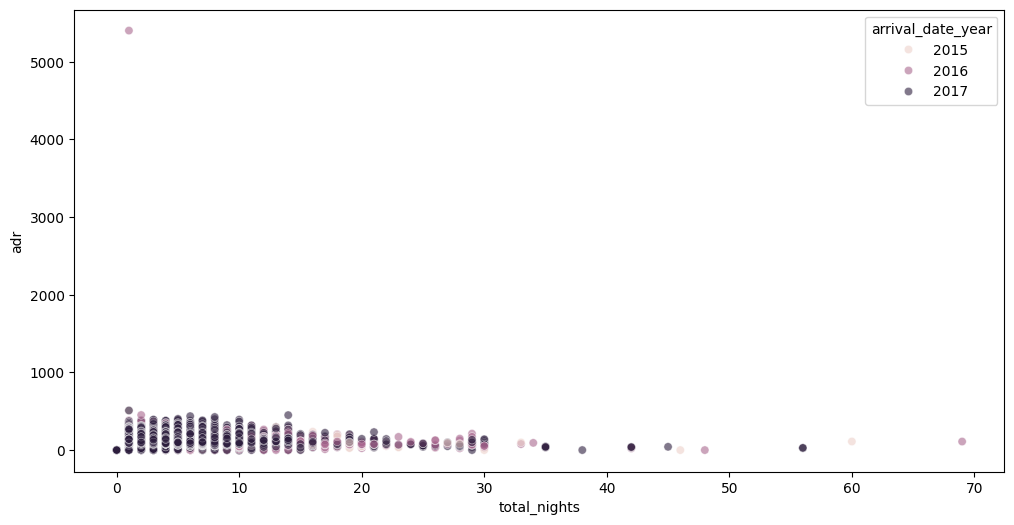

In [430]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_nights', hue = 'arrival_date_year', data = df1, alpha = 0.6)
plt.show()

From the above plot, we see that most of the visitors tend to cluster around short night stays ranging between 1 - 10. 
We also see that there is a massive outlier with the adr value as well as total nights, those could be due to data errors. Let's investigate this further.

In [431]:
df1.loc[df1['adr'] >= 1000, :]

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,hotel_type,total_visitors,total_nights,visitor_type
48515,1,35,2016,March,13,25,Bed and Breakfast,Portugal,Offline TA/TO,TA/TO,0,0,0,A,A,1,Non Refund,12,NULL,0,Transient,"5,400.00",0,0,Canceled,2016-02-19,resort,2,1,couples


We see that there is one record of a ridiculous adr (for just one night). This record also shows that the booking was cancelled. 
We may need to separate this record since it is an outlier that would skew our analysis.

Let's plot the chart again, this time, setting the hue to be the different cancellation statuses.

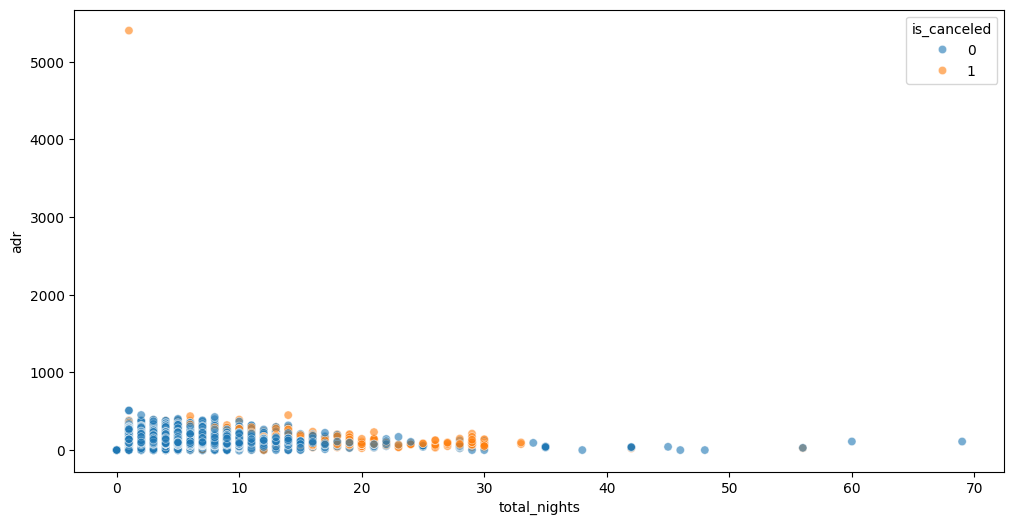

In [432]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_nights', hue = 'is_canceled', data = df1, alpha = 0.6) # We'd recall the chart this time setting the hue to the canclelled field, this wil color out the cancelled and uncancelled points and make it easier to identify.
plt.show()

This tells a clearer story. 

Our scatter plot shows that the outlier stems from a canceled booking.

We also see that shorter stays tend to be more costly than longer stays.

Worthy of note is also the fact that for shorter days, the adr shows a spread ranging from 1 to about 500, and when we look towards longer night stays, we begin to see a thinning out of the adr values, indicating that longer stays tend to be cheaper on a per night basis.

Next, lets plot a correlation chart to find relationships between fields or activities. 
For this, we need to drop off some unnecessary fields from the entire dataset as well as separating the numerical fields.

In [433]:
df1_int_cols = df1.select_dtypes(include = ['float64', 'int64'])# Selecting all numeric fields in the dataset

In [434]:
df1_int_cols.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_visitors', 'total_nights'],
      dtype='object')

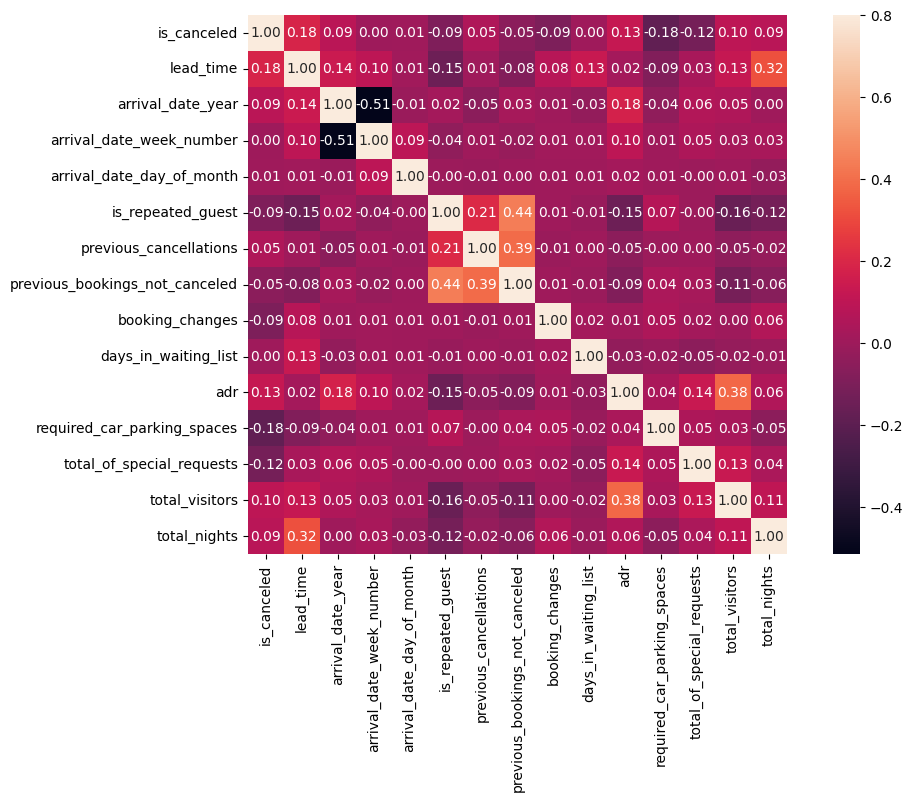

In [435]:
# Lets plot a correlation chart to explore if there are any relationships between the fields.

corrmat = df1_int_cols.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

#### Previous bookings & repeated guests = 0.44
We note that repeat guests have a longer booking history. Previous guests show more successful past bookings as well as past cancellations as the relationship between repeteaded guests and cancellations shows 0.12, indecating a slight relationship.

#### ADR & total visitors 0.38
There's a clear tendency for more visitors to have a higher adr, however, the relationship does not categorically tell us that more customers would leat=d to higher adr.

#### Lead time & total nights = 0.32
Bookings made further in advance tend to be slightly longer stays, but the relationship isn’t strong; many short stays are booked early and many long stays are booked late.

#### Required Parking space & Cancelled Bookings = -0.18
The matrics shows that on the average, bookings that have asked for more parking spaces are less likely to be cancelled.

#### Total special requests & Cancelled Bookings  = 0.12
Special guests tend to be more intentional about their stay at the hotel.

#### Cancelled Bookings & ADR = 0.13
We also see that adr could also have some impact on cancellations.

#### Repeated guests &  ADR = 0.15
This shows that on the average, repeat guests are likely to pay a bit less per night than new or first-time customers.

To answer some possible questions, we could explore cancellations further to understand what factors could be influencing cancellations.

In [436]:
canceled_bookings = df1.loc[df1['is_canceled'] == 1, :]

# Q1: What percent of visitor types have the highest cancellation rates?

In [437]:
grp1 = canceled_bookings.groupby(['visitor_type']).agg({'adr':'count'}).reset_index()
grp1.columns = ['visitor_type', 'n_cancellations']
grp1['group_tt'] = canceled_bookings['visitor_type'].shape[0] #shape[0] to pull in the total bookings

grp1 = grp1[['visitor_type','n_cancellations', 'group_tt']] # Rearranging the columns
grp1['cancelation_rte'] = (grp1['n_cancellations'] / grp1['group_tt']) * 100

grp1

# canceled_bookings['visitor_type'].value_counts()

,visitor_type,n_cancellations,group_tt,cancelation_rte
0,couples,17797,24009,74.13
1,family,3038,24009,12.65
2,single,3174,24009,13.22


Of the total group, the couples segment is seen to have the highest number of cancellations with about 75% of the over all cancellations, followed by singles and then families.

This tells us that when a booking is cancelled, 3 out of 4 times, its from the Couple's segment.


# Q2: For each segment? what is the cancellation rate?

In [438]:
# Since we would be relying on this structure for quick insights, lets create function that will allow us generate summary tables dynamically.
def generate_cancelled_summary_table(header: str):

    """This function generates a summary table based on the header provided for the cancelled dataframe.
    The function would take a header in string format, aggregate and return a summary table
    showing the number of bookings per category, total bookings, percentage of bookings and total adr per
    """
    cancelled_grp1 = canceled_bookings.groupby(header).agg({'adr':'count'}).reset_index()
    cancelled_grp1.columns = ['visitor_type', 'n0_of_cancellations']
    cancelled_grp1['group_tt'] = df1['visitor_type'].value_counts().values # value_counts didn't work because..... so we had to add .values 
    cancelled_grp1 = cancelled_grp1[['visitor_type','n0_of_cancellations', 'group_tt']]
    cancelled_grp1['cancelation_rte'] = (cancelled_grp1['n0_of_cancellations'] / cancelled_grp1['group_tt']) * 100

    return cancelled_grp1

generate_cancelled_summary_table('visitor_type')


,visitor_type,n0_of_cancellations,group_tt,cancelation_rte
0,couples,17797,62059,28.68
1,family,3038,16284,18.66
2,single,3174,8887,35.72


This picture shows us that on the average, for every 100 bookings, around 36 single visitor bookings are cancelled, around 29 couple bookings are cancelled, about 19 family bookings are cancelled.

This is a clearer view on things as it tells us that while Couples have the highest overall cancellation rate, within each segment, The Singles are actually the most likely to cancel. The family segment is the least likely to cancel.

Tying it all together, in absolute contributions, the Couples segnent have the highest but only because they book the most; a closer look shows that Singles are actually the most cancellation-prone with every 100 bookings showing 36 cancelations vs 29 from Couples. 

Now lets look more closely at adr and bookings.

We could beging by plotting a histogram, before this exploration is done, it would be pertinent to separate the dataset so as to properly analyze our dataset without the noise of cancelled bookings.

In [439]:
# creating a cleaned dataframe that only contains non-cancelled bookings
cleaned_df = df1.loc[df1['is_canceled'] == 0, :]

Text(0.5, 4.444444444444445, 'ADR Amount')

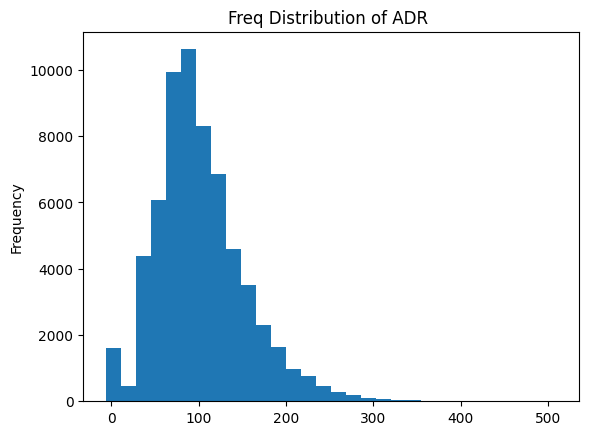

In [440]:
cleaned_df['adr'].plot(kind='hist', bins = 30, title = 'Freq Distribution of ADR ')
ax.set_xlabel('ADR Amount')

From the above, we can see that more guests tend to cluster around the 50 and 120 adr mark. This suggests that most guests tend to go for mid-range priced rooms.
    
As the chart shifts to the left, we see the number of guests reduce. This indicates to us that as the prices go up, the number of guests willing to pay such prices reduce as well.

We could continue exploring the dataset further to uncover more insights that could help the hotel management make informed decisions to improve their services and increase profitability. 
Some potential areas for further analysis include:

## Q3: What's the total adr per segment for non-canceled bookings?

In [441]:
# Since we would be relying on this structure for quick insights, lets create function that will allow us generate summary tables dynamically.

def generate_summary_table(header: str): # The expected parameters for this function is the column name we would like to group by.
    
    """This function generates a summary table for the uncancelled dataframe based on the header provided.
    The function would take a header in string format, aggregate and return a summary table
    showing the number of bookings per category, total bookings, percentage of bookings and total adr per
    """
    grp_tbl = cleaned_df.groupby(header).agg({'adr': ['count', 'sum']}).reset_index()
    grp_tbl.columns = [header, 'bookings_per_category', 'total_adr']
    grp_tbl['total_bookings'] = cleaned_df.shape[0]
    grp_tbl['%'] = (grp_tbl['bookings_per_category'] / grp_tbl['total_bookings'])  * 100
    grp_tbl['avg_adr_per_booking'] = round(grp_tbl['total_adr'] / grp_tbl['bookings_per_category'], 2) 
    grp_tbl = grp_tbl[[header, 'bookings_per_category', 'total_bookings', '%', 'total_adr','avg_adr_per_booking',]].sort_values(by = ('bookings_per_category'), ascending = False).reset_index(drop=True)

    return grp_tbl

In [442]:
summ = generate_summary_table('visitor_type')
summ
  

,visitor_type,bookings_per_category,total_bookings,%,total_adr,avg_adr_per_booking
0,couples,44262,63221,70.01,"4,579,920.68",103.47
1,single,13110,63221,20.74,"1,000,107.62",76.29
2,family,5849,63221,9.25,"882,055.78",150.80


In [443]:
print(f'From this summary, we see that the segment with the highest category of bookings is the {summ.loc[0, "visitor_type"].capitalize()} category showing a total of {summ.loc[0, "bookings_per_category"]:,.0f} bookings, which accounts for {summ.loc[0, "%"]:.2f}% of all bookings.\nThe ADR from this segment amounts to {summ.loc[0, "total_adr"]:,.2f} USD. The segment with the least contribution to the over all share is the {summ.iloc[2,0].capitalize()} segment contributing just {summ.iloc[2, 3]:.2f}% to the emtire share.')

From this summary, we see that the segment with the highest category of bookings is the Couples category showing a total of 44,262 bookings, which accounts for 70.01% of all bookings.
The ADR from this segment amounts to 4,579,920.68 USD. The segment with the least contribution to the over all share is the Family segment contributing just 9.25% to the emtire share.



We could also plot a bar graph to visualize the adr per segment. 

In [466]:
summ

,visitor_type,bookings_per_category,total_bookings,%,total_adr,avg_adr_per_booking
0,couples,44262,63221,70.01,"4,579,920.68",103.47
1,single,13110,63221,20.74,"1,000,107.62",76.29
2,family,5849,63221,9.25,"882,055.78",150.80


In [ ]:

# Get a blue gradient, highest to lowest (dark to light)
def create_barchart(df: DataFrame, x_axis: str, y_axis_main: str, chart_name: str, 
                    y_axis_snd = None, main_label = None, snd_label_title = None):

    n = len(df)
    blues = sns.color_palette("Blues", n)
    blues.reverse()

    # Sort once so everything uses the same order
    df_sorted = df.sort_values(y_axis_main, ascending=False)

    fig, ax1 = plt.subplots(figsize=(10, 5))

    # Main bar chart
    sns.barplot(x = x_axis, y = y_axis_main, data = df_sorted, palette = blues, ax = ax1)

    ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
    ax1.set_ylabel(main_label or y_axis_main)

    # labels on top of the bars
    for p in ax1.patches:
        ax1.text(
            p.get_x() + p.get_width() / 2,
            p.get_height(),
            f'{int(p.get_height()):,}',
            ha='center',
            va='bottom',
            fontsize=10,
            color='black'
        )

    if y_axis_snd is not None:
        second_color = "#8B0404"   # set the color to deep red

        ax2 = ax1.twinx()
        ax2.plot(
            df_sorted[x_axis],
            df_sorted[y_axis_snd],
            marker='o',
            color=second_color
        )

        ax2.set_ylabel(snd_label_title or y_axis_snd, color = second_color)
        ax2.tick_params(axis = 'y', colors = second_color)
        ax2.spines['right'].set_color(second_color)

        ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

/var/folders/rl/5mc45c9n4n520lk6nhv1cvfr0000gp/T/ipykernel_21545/3933691485.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = x_axis, y = y_axis_main, data = df_sorted, palette = blues, ax = ax1)


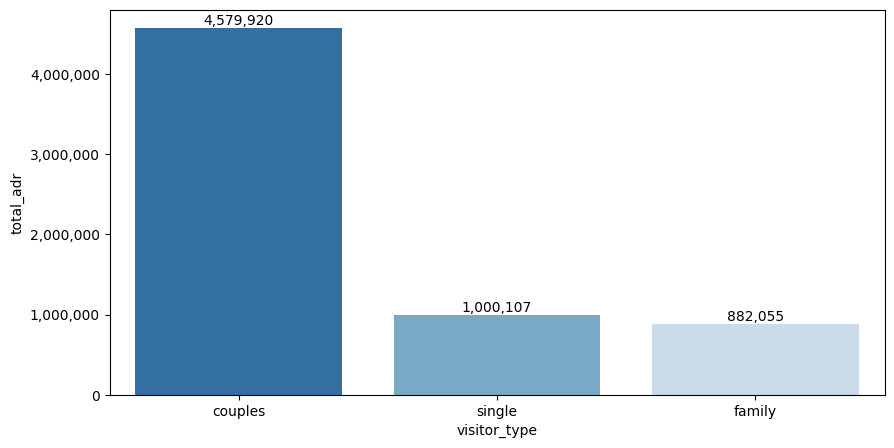

In [ ]:
create_barchart(summ, 'visitor_type', 'total_adr', 'Total ADR by Visitor Type') # now we call the function by passing the parameters we have defined

From this, we can see that while the couples segment also holds the highest cancellation rate overall, they are still the most valuable segment in the hotel. 

## Q4 Hotel-analysis

/var/folders/rl/5mc45c9n4n520lk6nhv1cvfr0000gp/T/ipykernel_21545/3933691485.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = x_axis, y = y_axis_main, data = df_sorted, palette = blues, ax = ax1)


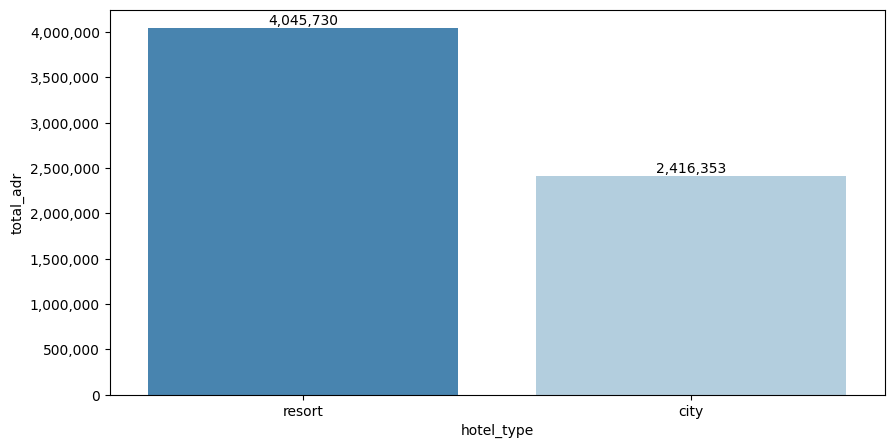

In [467]:
create_barchart(h_grp, 'hotel_type', 'total_adr', 'Total ADR (€) by Hotel Type' )

The Resort hotel is the biggest money driver between both hotels with about 67% higher average daily rate contributing about 60% to the total.
Resort hotel also has a higher valuation costing about €109 per booking compared to City's €93 per booking.

This tells us that customers are more attracted to the Resort hotel, perhaps due to the serenety of its envirounments or probably because of the calmness away from the city. 

## Q5: Which month has the highest number of bookings?

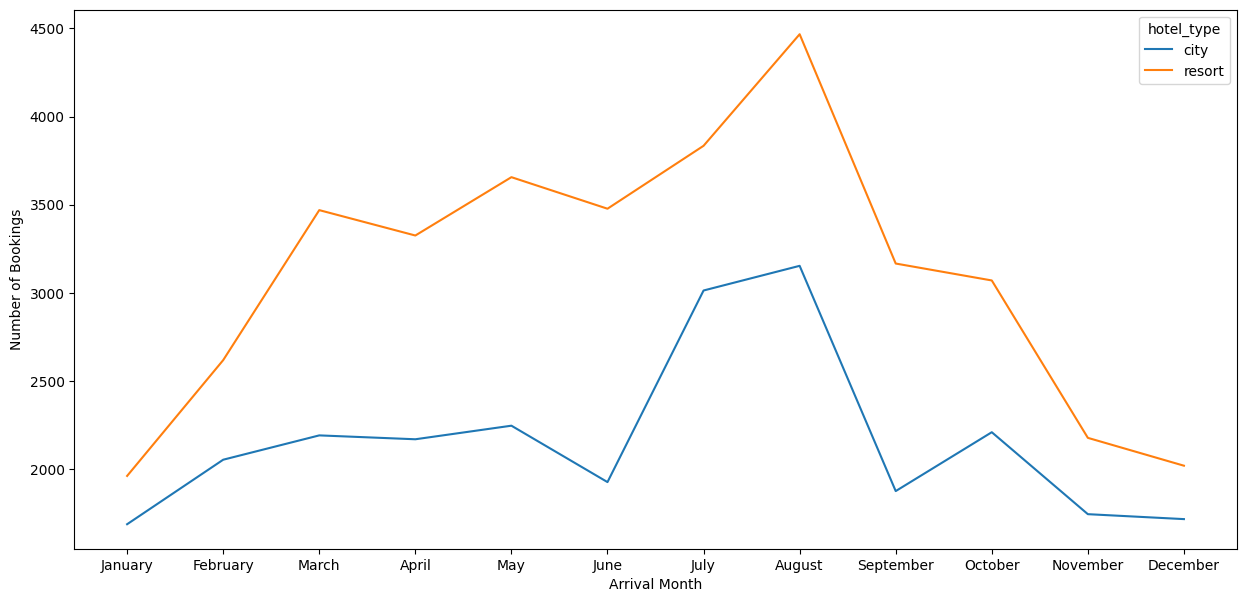

In [451]:
monthly = (cleaned_df.groupby(['arrival_date_month', 'hotel_type']).size().reset_index(name='bookings')) # Group resort hotel by total adr per month

# Since the months are unordered as value_counts orders in decending order, we would need to reorder the months correctly.
mon_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] # Set a list to order the months.

monthly['arrival_date_month'] = pd.Categorical(monthly['arrival_date_month'], categories=mon_order, ordered=True) # Order the df using the Categorical method.
monthly = monthly.sort_values('arrival_date_month').reset_index(drop=True)
# final_hotel

sns.lineplot(
    data=monthly,
    x='arrival_date_month',
    y='bookings',
    hue='hotel_type'        
)

plt.ylabel('Number of Bookings')
plt.xlabel('Arrival Month')
fig = plt.gcf()
fig.set_size_inches(15, 7)
plt.show()

The resort and city both show seasonality quite clearly with volumes starting to increase from January and peaking in August and September before tailing off again into the winter.

The resort is much more seasonal in its demand: here it is clear that the hotel relies on the summer months where volumes are much higher, which then drops sharply towards the end of the year.

The city hotel shows the same trend, but with a less volatile peak, suggesting a more stable mix of demand all year round.

## Q6 What countries have the highest number of bookings and total adr?

In [452]:
country_grp = generate_summary_table('country')

# Set the summary table to be ordered by the total bookings
country_grp.sort_values(by = 'bookings_per_category', ascending = False, inplace = True)
c_bookings = country_grp.head(10)
c_bookings

,country,bookings_per_category,total_bookings,%,total_adr,avg_adr_per_booking
0,Portugal,17573,63221,27.80,"1,615,357.69",91.92
1,United Kingdom,8440,63221,13.35,"775,393.46",91.87
2,France,7091,63221,11.22,"772,177.05",108.90
3,Spain,5382,63221,8.51,"624,377.57",116.01
4,Germany,4332,63221,6.85,"443,012.71",102.27
5,Ireland,2347,63221,3.71,"225,620.93",96.13
6,Italy,1986,63221,3.14,"224,424.47",113.00
7,Belgium,1670,63221,2.64,"188,624.80",112.95
8,Netherlands,1560,63221,2.47,"165,715.32",106.23
9,United States,1412,63221,2.23,"172,650.05",122.27


In [453]:
# Set the summary table to be ordered by the total adr

country_grp.sort_values(by = 'total_adr', ascending = False, inplace = True)
c_adr = country_grp.head(10)
c_adr

,country,bookings_per_category,total_bookings,%,total_adr,avg_adr_per_booking
0,Portugal,17573,63221,27.80,"1,615,357.69",91.92
1,United Kingdom,8440,63221,13.35,"775,393.46",91.87
2,France,7091,63221,11.22,"772,177.05",108.90
3,Spain,5382,63221,8.51,"624,377.57",116.01
4,Germany,4332,63221,6.85,"443,012.71",102.27
5,Ireland,2347,63221,3.71,"225,620.93",96.13
6,Italy,1986,63221,3.14,"224,424.47",113.00
7,Belgium,1670,63221,2.64,"188,624.80",112.95
9,United States,1412,63221,2.23,"172,650.05",122.27
8,Netherlands,1560,63221,2.47,"165,715.32",106.23


/var/folders/rl/5mc45c9n4n520lk6nhv1cvfr0000gp/T/ipykernel_21545/3933691485.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = x_axis, y = y_axis_main, data = df_sorted, palette = blues, ax = ax1)


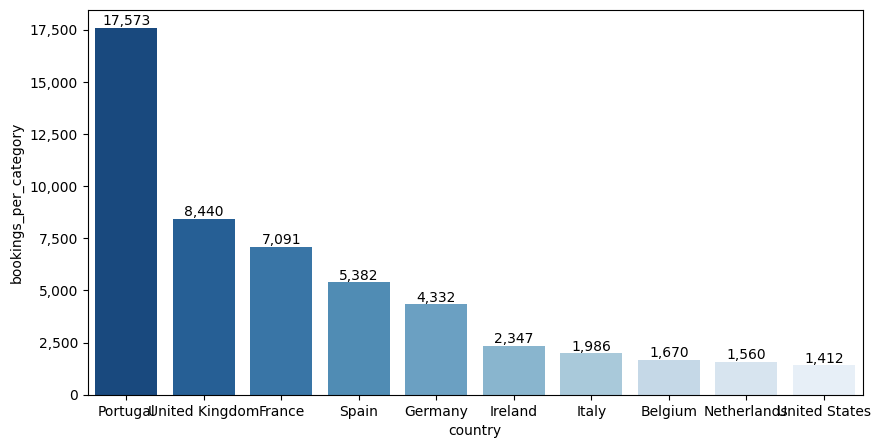

In [454]:
create_barchart(c_bookings, 'country', 'bookings_per_category', 'Top 10 bookings per country')

** analysis **

/var/folders/rl/5mc45c9n4n520lk6nhv1cvfr0000gp/T/ipykernel_21545/3933691485.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = x_axis, y = y_axis_main, data = df_sorted, palette = blues, ax = ax1)


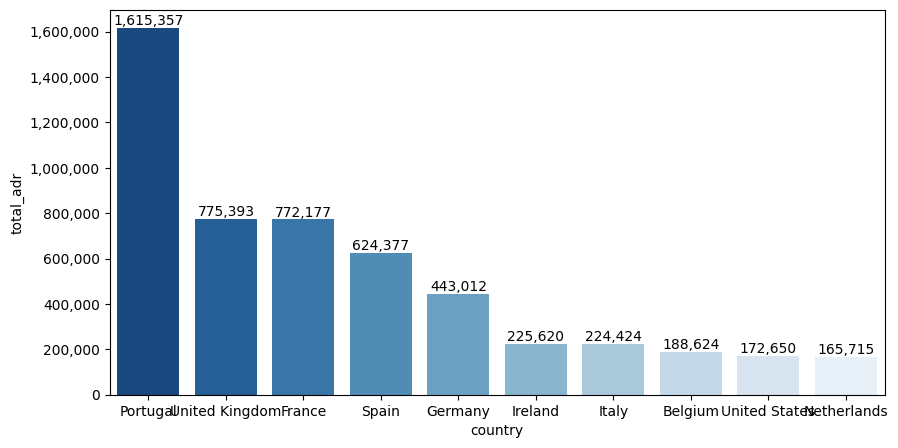

In [455]:
create_barchart(c_adr, 'country', 'total_adr', 'Top 10 adr by country')

In [456]:
print(f'The top 5 bookings by country are also consistent with the top 5 countries generating the highest adr.\nWe see that Portugal, the UK, France, Spain and Germany leading with ${c_adr.iloc[0,1]:,.0f}, ${c_adr.iloc[1,1]:,.0f}, ${c_adr.iloc[2,1]:,.0f}, ${c_adr.iloc[3,1]:,.0f} and ${c_adr.iloc[4,1]:,.0f} USD respectively in adr amounts.')

The top 5 bookings by country are also consistent with the top 5 countries generating the highest adr.
We see that Portugal, the UK, France, Spain and Germany leading with $17,573, $8,440, $7,091, $5,382 and $4,332 USD respectively in adr amounts.


In [457]:
cleaned_df.distribution_channel.unique()


array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

## Q6: What distribution channel brings the most revenue?

In [458]:
# Lets take a quick glance of the distribution channels
cleaned_df.distribution_channel.unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [459]:
dist_channel_sum = generate_summary_table('distribution_channel')
dist_channel_sum

,distribution_channel,bookings_per_category,total_bookings,%,total_adr,avg_adr_per_booking
0,TA/TO,47628,63221,75.34,"4,958,674.16",104.11
1,Direct,11031,63221,17.45,"1,188,646.17",107.76
2,Corporate,4416,63221,6.99,"297,290.88",67.32
3,GDS,145,63221,0.23,"17,360.17",119.73
4,Undefined,1,63221,0.00,112.70,112.70


/var/folders/rl/5mc45c9n4n520lk6nhv1cvfr0000gp/T/ipykernel_21545/3933691485.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = x_axis, y = y_axis_main, data = df_sorted, palette = blues, ax = ax1)


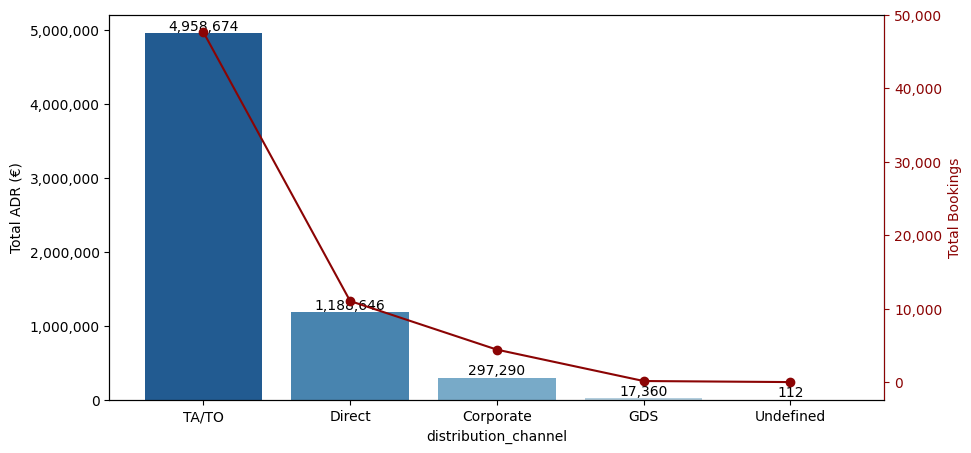

In [460]:
create_barchart(dist_channel_sum, 'distribution_channel', 'total_adr', 'Total adr by Distribution Channel', 
                'bookings_per_category', 'Total ADR (€)', 'Total Bookings')

In [461]:
dist_channel_sum

,distribution_channel,bookings_per_category,total_bookings,%,total_adr,avg_adr_per_booking
0,TA/TO,47628,63221,75.34,"4,958,674.16",104.11
1,Direct,11031,63221,17.45,"1,188,646.17",107.76
2,Corporate,4416,63221,6.99,"297,290.88",67.32
3,GDS,145,63221,0.23,"17,360.17",119.73
4,Undefined,1,63221,0.00,112.70,112.70


In [462]:
print(f'The {dist_channel_sum.loc[0,'distribution_channel']} channel completly dwarfs other channels by a wide magin contributing {dist_channel_sum.loc[0,'%']:.2f}% to the overall figure. \n{dist_channel_sum.iloc[1,0]} are a distant second with a total of {dist_channel_sum.iloc[2,4]:,.2f}€.\nWhile this tells us that the Travel agents or Travel operators help the business with its strong revenue stream, it also poses a problem as we see an obvious concentration on the channel, which could be quite risky; if the agents decide to switch loyalty, it could result in a costly problem for the hotel.')

The TA/TO channel completly dwarfs other channels by a wide magin contributing 75.34% to the overall figure. 
Direct are a distant second with a total of 297,290.88€.
While this tells us that the Travel agents or Travel operators help the business with its strong revenue stream, it also poses a problem as we see an obvious concentration on the channel, which could be quite risky; if the agents decide to switch loyalty, it could result in a costly problem for the hotel.


Let's check to see if the Travel Agents channel is just high based on volume alone or if they also bring about higher spend per booking. We'll do this by computing the average revenue per booking.

In [463]:
# we'd use the lambda function to apply our computatation to the table using axis = 1 to apply column-wise.
dist_channel_sum['avg_rev_per_booking'] = dist_channel_sum.apply(lambda x: x['total_adr'] / x['bookings_per_category'], axis=1)

In [464]:
dist_channel_sum

,distribution_channel,bookings_per_category,total_bookings,%,total_adr,avg_adr_per_booking,avg_rev_per_booking
0,TA/TO,47628,63221,75.34,"4,958,674.16",104.11,104.11
1,Direct,11031,63221,17.45,"1,188,646.17",107.76,107.76
2,Corporate,4416,63221,6.99,"297,290.88",67.32,67.32
3,GDS,145,63221,0.23,"17,360.17",119.73,119.73
4,Undefined,1,63221,0.00,112.70,112.70,112.70


Now we see that an average booking that comes in through the TA/TO channel brings in about €104 per booking, High but less valuable than the Direct channel which brings in €107. GDS channel actiually has the highest value per booking however, the volumns are really low.